# Random Forest 

Diyelim ki birkaç sınıflandırıcı eğittiniz ve her biri yaklaşık %80 doğruluk elde etti. Bir Lojistik Regresyon sınıflandırıcınız, bir SVM sınıflandırıcınız, bir Rastgele Orman sınıflandırıcınız, bir K-En Yakın Komşu sınıflandırıcınız ve belki birkaçı daha olabilir.

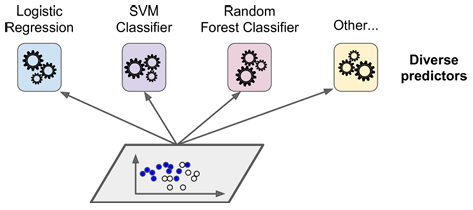

Daha iyi bir sınıflandırıcı oluşturmanın çok basit bir yolu, her sınıflandırıcının tahminlerini birleştirmek ve en çok oyu alan sınıfı tahmin etmektir. Bu çoğunluk oyu sınıflandırıcısına sert oy kullanan sınıflandırıcı (hard voting classifier) denir.

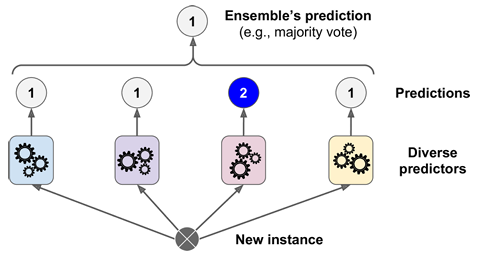

Biraz şaşırtıcı bir şekilde, bu oy çoklu sınıflandırıcı genellikle topluluk içindeki en iyi sınıflandırıcıdan daha yüksek bir doğruluk oranı elde eder. Aslında, her bir sınıflandırıcı zayıf bir öğrenici olsa bile (yani sadece rastgele tahmin etmekten biraz daha iyiyse), yeterli sayıda zayıf öğrenici varsa ve bunlar yeterince çeşitliyse, topluluk yine de güçlü bir öğrenici olabilir (yüksek doğrulukla sonuçlanır).

Bu nasıl mümkün olabilir? Aşağıdaki benzetme bu gizemin anlaşılmasına yardımcı olabilir. Diyelim ki hafifçe yanlı bir madeni paraya sahipsiniz ve tura gelme olasılığı %51, yazı gelme olasılığı %49. Eğer bu parayı 1.000 kez atarsanız, genellikle yaklaşık 510 tura ve 490 yazı gelir ve dolayısıyla turaların çoğunluğu oluşur. Matematiği yaparsanız, 1.000 atıştan sonra turaların çoğunluğunu elde etme olasılığının yaklaşık %75 olduğunu görürsünüz. Madeni parayı ne kadar çok atarsanız, olasılık o kadar artar (örneğin, 10.000 atışta olasılık %97’nin üzerine çıkar). Bu, büyük sayılar kanunundan kaynaklanır: Madeni parayı atmayı sürdürdükçe, turaların oranı tura gelme olasılığına (%51) giderek daha fazla yaklaşır. Yanlı 10 madeni para atışı serisini göstermektedir. Atış sayısı arttıkça, turaların oranının %51’e yaklaştığını görebilirsiniz. Sonuçta, tüm 10 seri öyle bir noktaya gelir ki %51’e çok yakın olup sürekli olarak %50’nin üzerinde olur.

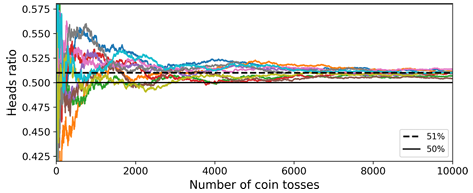

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris() 

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
log_clf = LogisticRegression(max_iter = 200)
rnd_clf = RandomForestClassifier()
svm_clf = SVC() 

voting_clf= VotingClassifier(
    estimators = [("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting="hard"
) 

voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [4]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9666666666666667
RandomForestClassifier 0.9666666666666667
SVC 0.9333333333333333
VotingClassifier 0.9666666666666667


Çeşitli sınıflandırıcılar elde etmenin bir yolu, az önce tartışıldığı gibi, çok farklı eğitim algoritmaları kullanmaktır. Bir diğer yaklaşım ise her tahmin edici için aynı eğitim algoritmasını kullanmak ve onları eğitim setinin farklı rastgele alt küme/train setlerinde eğitmektir. Örnekleme, geri koyma ile yapıldığında, bu yönteme bagging (bootstrap toplama'nın kısaltması) denir. Örnekleme geri koymadan yapıldığında ise buna pasting denir.

Başka bir deyişle, hem bagging hem de pasting, eğitim örneklerinin birden fazla tahminleyici arasında birkaç kez örneklenmesine izin verir, ancak yalnızca bagging, eğitim örneklerinin aynı tahminleyici için birkaç kez örneklenmesine izin verir. Bu örnekleme ve eğitim süreci gösterilmiştir.

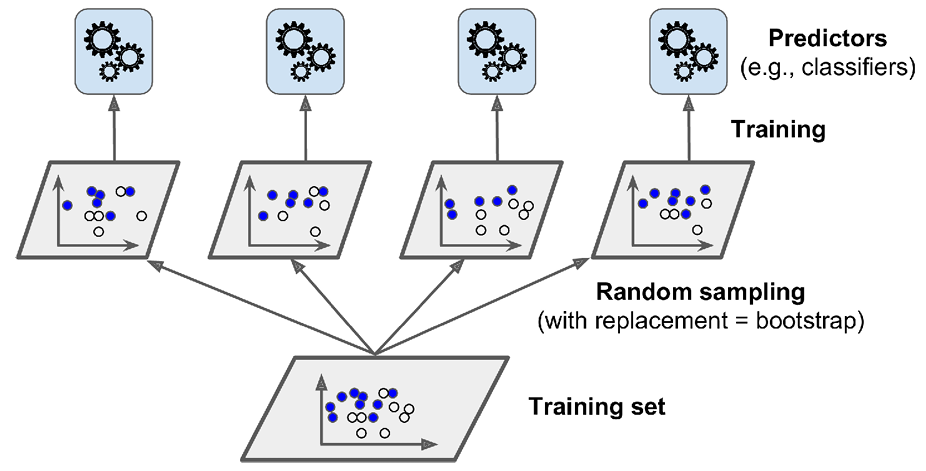

# Bagging and Pasting in Scikit-Learn 

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

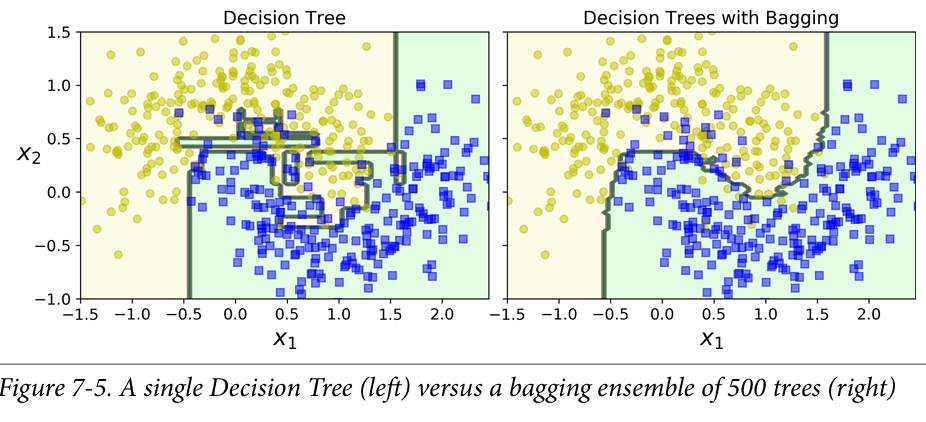

In [6]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1, oob_score = True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9583333333333334

In [7]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [8]:
bag_clf.oob_decision_function_

array([[0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.00434783, 0.99565217],
       [0.        , 0.99095023, 0.00904977],
       [0.        , 0.07692308, 0.92307692],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.00465116, 0.99534884],
       [0.        , 0.01522843, 0.98477157],
       [0.        , 0.02094241, 0.97905759],
       [0.

# Random Forest

Rassal Ormanlar Daha önce tartıştığımız gibi, Rassal Orman, genellikle bagging yöntemiyle (veya bazen pasting ile) eğitilen, Karar Ağaçlarından oluşan bir topluluktur ve genellikle max_samples eğitim setinin boyutuna ayarlanır. Bir BaggingClassifier oluşturup ona bir DecisionTreeClassifier vermek yerine, daha uygun ve Karar Ağaçları için optimize edilmiş olan RandomForestClassifier sınıfını kullanabilirsiniz (benzer şekilde, regresyon görevleri için de bir RandomForestRegressor sınıfı vardır). Aşağıdaki kod, 500 ağaçla bir Rassal Orman sınıflayıcısını eğitmek için kullanılabilir ve tüm mevcut CPU çekirdeklerini kullanır (her biri maksimum 16 düğümle sınırlandırılmıştır):

In [9]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 16), n_estimators = 500, max_samples = 1.0, bootstrap = True, n_jobs = -1
)

In [11]:
rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rnd_clf.fit(X, y)

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09006326404138229
sepal width (cm) 0.020509135699280014
petal length (cm) 0.4285492779013632
petal width (cm) 0.46087832235797455


AdaBoost; yeni bir tahmincinin önceki tahmincisini düzeltmesinin bir yolu, önceki tahmincinin yetersiz başarı gösterdiği eğitim örneklerine biraz daha fazla dikkat etmektir. Bu, yeni tahmincilerin giderek daha fazla zor durumlara odaklanmasıyla sonuçlanır. İşte AdaBoost'ın kullandığı teknik budur. Örneğin, bir AdaBoost sınıflandırıcısı eğitilirken, algoritma önce bir temel sınıflandırıcıyı (örneğin Karar Ağacı) eğitir ve bunu eğitim seti üzerinde tahmin yapmak için kullanır. Algoritma daha sonra yanlış sınıflandırılmış eğitim örneklerinin göreceli ağırlığını artırır. Ardından güncellenmiş ağırlıkları kullanarak ikinci bir sınıflandırıcıyı eğitir ve yine eğitim seti üzerinde tahminler yapar, örnek ağırlıklarını günceller ve bu süreç devam eder.

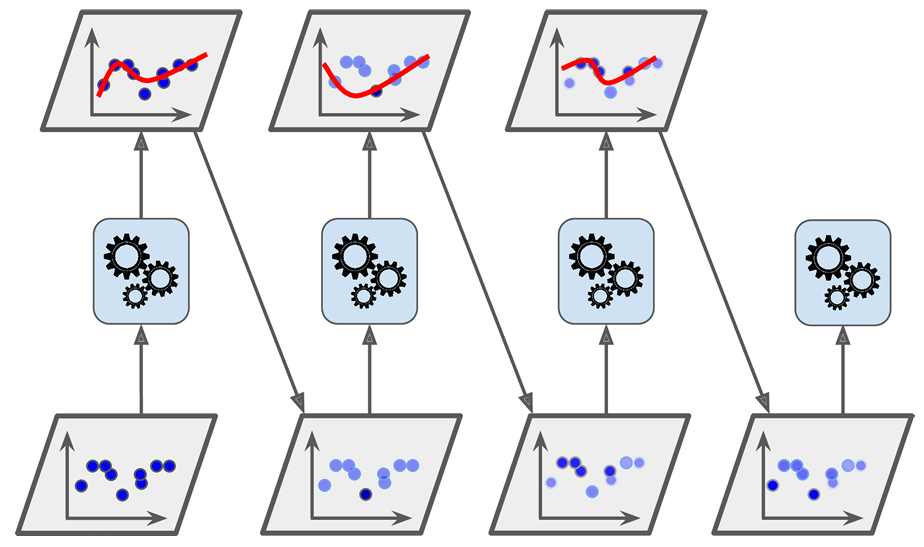

Bu nedenle ikinci sınıflayıcı bu örneklerde daha iyi bir iş çıkarıyor ve bu şekilde devam ediyor. Sağdaki grafik, aynı tahminci dizisini temsil ediyor, ancak öğrenme hızı yarıya indirilmiş durumda (yani, her iterasyonda yanlış sınıflandırılan örneklerin ağırlıkları sadece yarı kadar artırılıyor). Gördüğünüz gibi, bu ardışık öğrenme tekniği, Gradient Descent yöntemiyle bazı benzerlikler taşıyor; ancak tek bir tahmincinin parametrelerini bir maliyet fonksiyonunu minimize etmek için ayarlamak yerine, AdaBoost topluluğa yeni tahminciler ekleyerek onu kademeli olarak iyileştiriyor.

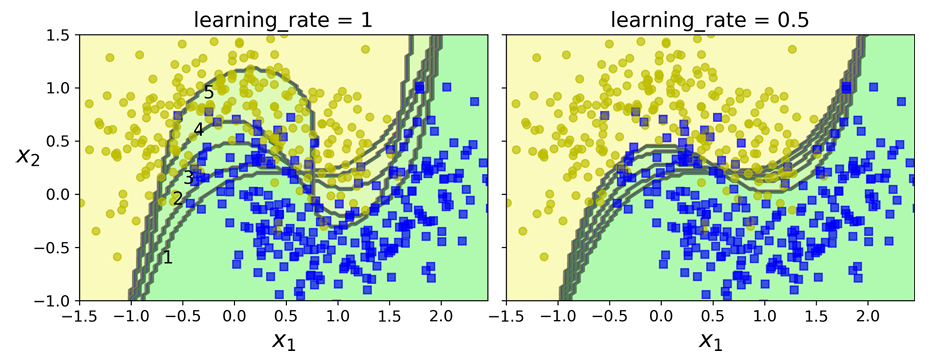

Bu ardışık öğrenme tekniğinin önemli bir dezavantajı vardır: paralel hale getirilemez (ya da sadece kısmen), çünkü her tahmin edici, yalnızca önceki tahmin edici eğitildikten ve değerlendirildikten sonra eğitilebilir. Sonuç olarak, çantalama (bagging) veya yapıştırma (pasting) kadar iyi ölçeklenmez.

In [12]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 200, algorithm = "SAMME", learning_rate = 0.5 
)

ada_clf.fit(X_train, y_train)

C:\Users\Mustafa Baki\AppData\Roaming\Python\Python313\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,200
,learning_rate,0.5
,algorithm,'SAMME'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2)
tree_reg1.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [14]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [15]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [17]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

NameError: name 'X_new' is not defined

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X, y)

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


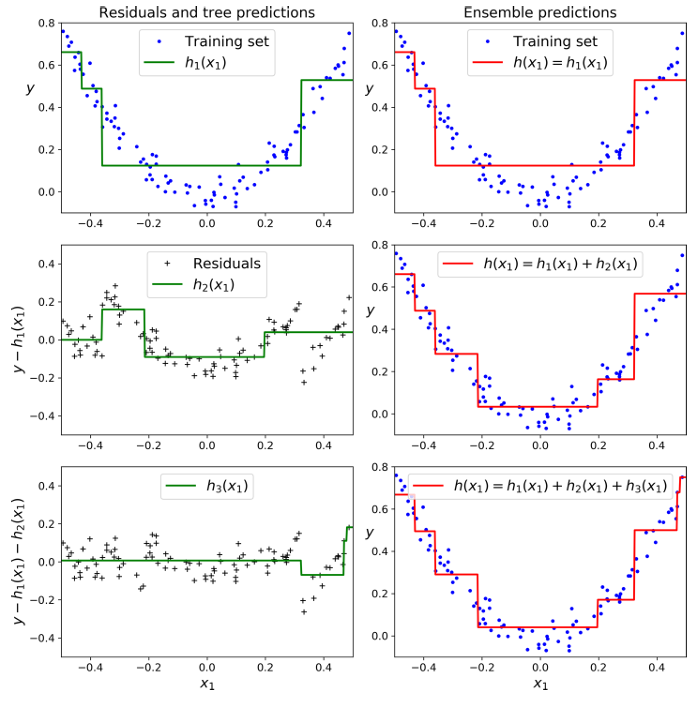

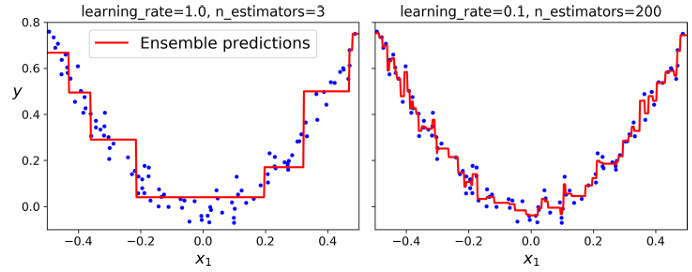

Optimal ağaç sayısını bulmak için erken durdurmayı kullanabilirsiniz. Bunu uygulamanın basit bir yolu, staged_predict() metodunu kullanmaktır: bu metod, her eğitim aşamasında (bir ağaç, iki ağaç vb. ile) topluluk tarafından yapılan tahminler üzerinde bir yineleyici döndürür. Aşağıdaki kod, 120 ağaçlı bir GBRT topluluğu eğitir, ardından eğitim aşamasının her adımında doğrulama hatasını ölçerek optimal ağaç sayısını bulur ve son olarak optimal ağaç sayısını kullanarak başka bir GBRT topluluğu eğitir:

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X, y)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,120
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [20]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimator = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimator)
gbrt_best.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,np.int64(120)
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


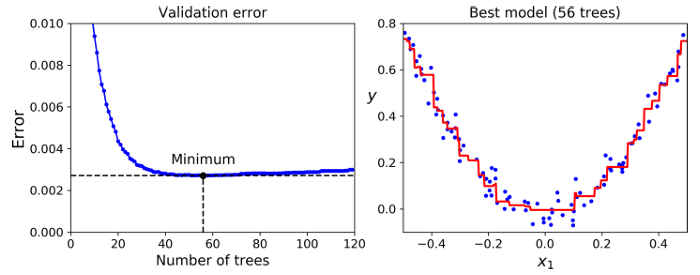

In [21]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120): 
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [23]:
import xgboost 
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [25]:
xgb_reg.fit(X_train, y_train,
eval_set=[(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.65564
[1]	validation_0-rmse:0.49703
[2]	validation_0-rmse:0.39113
[3]	validation_0-rmse:0.32372
[4]	validation_0-rmse:0.28341
[5]	validation_0-rmse:0.26396
[6]	validation_0-rmse:0.25106
[7]	validation_0-rmse:0.24276
[8]	validation_0-rmse:0.23800
[9]	validation_0-rmse:0.23523
[10]	validation_0-rmse:0.23357


[11]	validation_0-rmse:0.23310
[12]	validation_0-rmse:0.23284
[13]	validation_0-rmse:0.23266
[14]	validation_0-rmse:0.23231
[15]	validation_0-rmse:0.23197
[16]	validation_0-rmse:0.23180
[17]	validation_0-rmse:0.23105
[18]	validation_0-rmse:0.23075
[19]	validation_0-rmse:0.23062
[20]	validation_0-rmse:0.22992
[21]	validation_0-rmse:0.22938
[22]	validation_0-rmse:0.22896
[23]	validation_0-rmse:0.22863
[24]	validation_0-rmse:0.22838
[25]	validation_0-rmse:0.22843
[26]	validation_0-rmse:0.22850
[27]	validation_0-rmse:0.22856
[28]	validation_0-rmse:0.22857
[29]	validation_0-rmse:0.22856
[30]	validation_0-rmse:0.22861
[31]	validation_0-rmse:0.22865
[32]	validation_0-rmse:0.22862
[33]	validation_0-rmse:0.22855
[34]	validation_0-rmse:0.22849
[35]	validation_0-rmse:0.22848
[36]	validation_0-rmse:0.22847
[37]	validation_0-rmse:0.22847
[38]	validation_0-rmse:0.22847
[39]	validation_0-rmse:0.22847
[40]	validation_0-rmse:0.22847
[41]	validation_0-rmse:0.22847
[42]	validation_0-rmse:0.22847
[43]	val

# Stacking

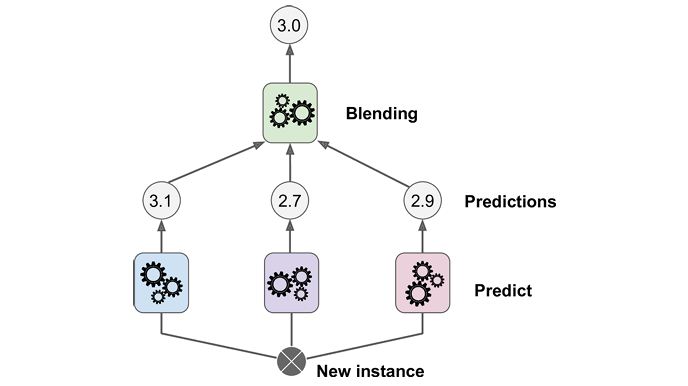

Blender'ı eğitmek için yaygın bir yaklaşım, bir ayırma (hold-out) seti kullanmaktır. Nasıl çalıştığını görelim. Öncelikle, eğitim seti iki alt kümeye ayrılır. Birinci alt küme, ilk katmandaki tahmin edicileri eğitmek için kullanılır.

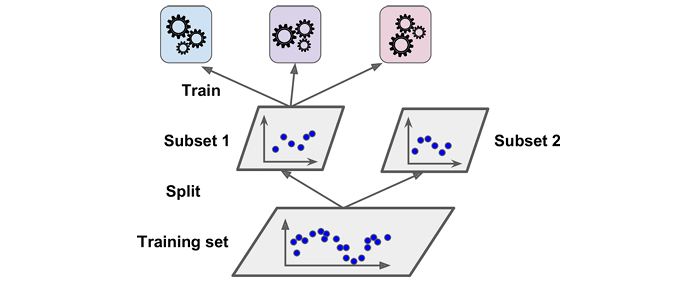

Sonraki adımda, birinci katmanın tahmincileri, ikinci (ayrılmış) veri kümesi üzerinde tahminler yapmak için kullanılır. Bu, tahminlerin “temiz” olmasını sağlar, çünkü tahminciler bu örnekleri eğitim sırasında hiç görmemiştir. Ayrılmış veri kümesindeki her örnek için üç tahmin değeri vardır. Bu tahmin değerlerini girdi özellikleri olarak kullanarak (bu yeni eğitim setini 3 boyutlu hale getirir) ve hedef değerleri koruyarak yeni bir eğitim seti oluşturabiliriz. Blender, bu yeni eğitim seti üzerinde eğitilir, böylece birinci katmanın tahminleri verildiğinde hedef değeri tahmin etmeyi öğrenir.

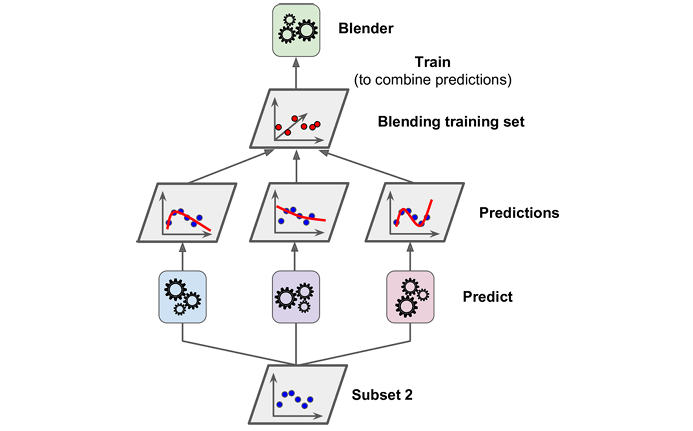

Aslında bu şekilde birkaç farklı birleştirici (blender) eğitmek mümkündür (örneğin, biri Lineer Regresyon kullanırken, diğeri Rastgele Orman Regresyonu kullanabilir) ve böylece bir dizi birleştirici katmanı elde edebilirsiniz. Püf noktası, eğitim setini üç alt kümeye ayırmaktır: birinci küme ilk katmanı eğitmek için kullanılır, ikinci küme ikinci katmanı eğitmek için kullanılacak eğitim setini oluşturmak amacıyla kullanılır (birinci katmanın tahmincileri tarafından yapılan tahminler kullanılarak) ve üçüncü küme, ikinci katmanın tahmincileri tarafından yapılan tahminleri kullanarak üçüncü katmanı eğitmek için eğitim setini oluşturmak için kullanılır. Bu yapıldıktan sonra, yeni bir örnek için öngörüde bulunmak, gösterildiği gibi, her katmandan sırayla geçilerek yapılabilir.

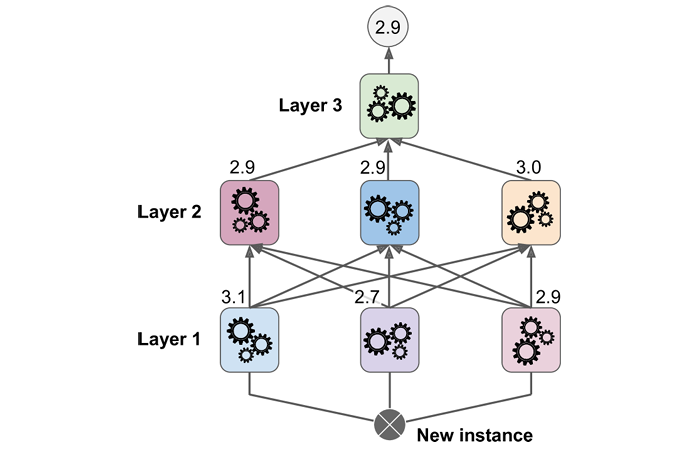

Ne yazık ki, Scikit-Learn doğrudan stacking'i desteklemiyor, ancak kendi uygulamanızı geliştirmek çok da zor değil. Alternatif olarak, DESlib gibi açık kaynaklı bir uygulama da kullanabilirsiniz.